# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | shimoda
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | hoquiam
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | nouadhibou
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | kristiansund
Processing Record 13 of Set 1 | baoding
Processing Record 14 of Set 1 | savave village
City not found. Skipping...
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | barra de santo antonio
Processing Record 17 of Set 1 | igarka
Processing Record 18 of Set 1 | progreso
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | grytviken
Proc

City not found. Skipping...
Processing Record 39 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 40 of Set 4 | presidente epitacio
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | kovernino
Processing Record 43 of Set 4 | polyarnyy
Processing Record 44 of Set 4 | pemba
Processing Record 45 of Set 4 | oranjestad
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | remire-montjoly
Processing Record 49 of Set 4 | praia da vitoria
Processing Record 0 of Set 5 | tazovsky
Processing Record 1 of Set 5 | adrar
Processing Record 2 of Set 5 | port shepstone
Processing Record 3 of Set 5 | grand rapids
Processing Record 4 of Set 5 | al bawiti
Processing Record 5 of Set 5 | zaozersk
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | yorkton
Processing Record 8 of Set 5 | new norfolk
Processing Record 9 of Set 5 | peniche
Processing Record 10 of Set 5 | 'ohonua
City not f

City not found. Skipping...
Processing Record 27 of Set 8 | trondheim
Processing Record 28 of Set 8 | kenai
Processing Record 29 of Set 8 | phan thiet
Processing Record 30 of Set 8 | las khorey
Processing Record 31 of Set 8 | chita
Processing Record 32 of Set 8 | mukah
City not found. Skipping...
Processing Record 33 of Set 8 | sodankyla
Processing Record 34 of Set 8 | charters towers
Processing Record 35 of Set 8 | latimer
Processing Record 36 of Set 8 | kurumkan
Processing Record 37 of Set 8 | nayudupet
Processing Record 38 of Set 8 | bukhara
Processing Record 39 of Set 8 | orkney
Processing Record 40 of Set 8 | xam nua
Processing Record 41 of Set 8 | ndele
Processing Record 42 of Set 8 | selfoss
Processing Record 43 of Set 8 | voss
Processing Record 44 of Set 8 | hauterive
Processing Record 45 of Set 8 | kegeyli shahar
Processing Record 46 of Set 8 | tegueste
Processing Record 47 of Set 8 | ebaye
Processing Record 48 of Set 8 | beawar
Processing Record 49 of Set 8 | seogwipo
City no

Processing Record 11 of Set 12 | padang
Processing Record 12 of Set 12 | dzhambeyty
Processing Record 13 of Set 12 | kegen
Processing Record 14 of Set 12 | mormugao
Processing Record 15 of Set 12 | altinyayla
Processing Record 16 of Set 12 | turpan
Processing Record 17 of Set 12 | tarko-sale
Processing Record 18 of Set 12 | sint michiel liber
Processing Record 19 of Set 12 | bargara
City not found. Skipping...
Processing Record 20 of Set 12 | santo antonio do ica
Processing Record 21 of Set 12 | balabac
Processing Record 22 of Set 12 | ketchikan
Processing Record 23 of Set 12 | usogorsk
Processing Record 24 of Set 12 | serres
Processing Record 25 of Set 12 | longjiang
Processing Record 26 of Set 12 | namtsy
Processing Record 27 of Set 12 | mtsensk
Processing Record 28 of Set 12 | san matias
Processing Record 29 of Set 12 | fort-shevchenko
Processing Record 30 of Set 12 | tsiolkovskiy
City not found. Skipping...
Processing Record 31 of Set 12 | chui
Processing Record 32 of Set 12 | sant

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(f"Total number of records: {len(city_data_df)}")

Total number of records: 556


In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,16.52,64,54,2.99,ZA,1691084226
1,edinburgh of the seven seas,-37.0676,-12.3116,14.51,85,96,16.61,SH,1691084226
2,lompoc,34.6391,-120.4579,25.47,77,20,7.72,US,1691084227
3,shimoda,34.6667,138.9500,26.17,88,19,5.23,JP,1691084227
4,port-aux-francais,-49.3500,70.2167,2.65,83,93,17.89,TF,1691084227


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("city_weather_data.csv", index=False)


In [28]:
# Read saved data
city_weather_data = pd.read_csv("city_weather_data.csv")

# Display sample data
print(city_weather_data.head())

                          City      Lat       Lng  Max Temp  Humidity  \
0                     hermanus -34.4187   19.2345     16.52        64   
1  edinburgh of the seven seas -37.0676  -12.3116     14.51        85   
2                       lompoc  34.6391 -120.4579     25.47        77   
3                      shimoda  34.6667  138.9500     26.17        88   
4            port-aux-francais -49.3500   70.2167      2.65        83   

   Cloudiness  Wind Speed Country        Date  
0          54        2.99      ZA  1691084226  
1          96       16.61      SH  1691084226  
2          20        7.72      US  1691084227  
3          19        5.23      JP  1691084227  
4          93       17.89      TF  1691084227  


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

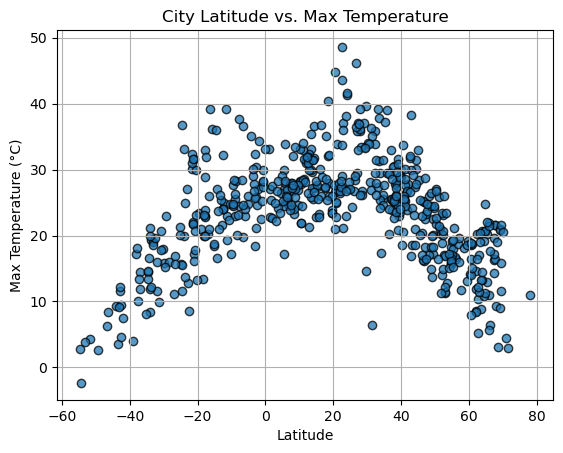

In [32]:
import os
# Build scatter plot for latitude vs. temperature
plt.scatter(city_weather_data["Lat"], city_weather_data["Max Temp"], edgecolor="black", alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

if not os.path.exists("output_data"):
    os.makedirs("output_data")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

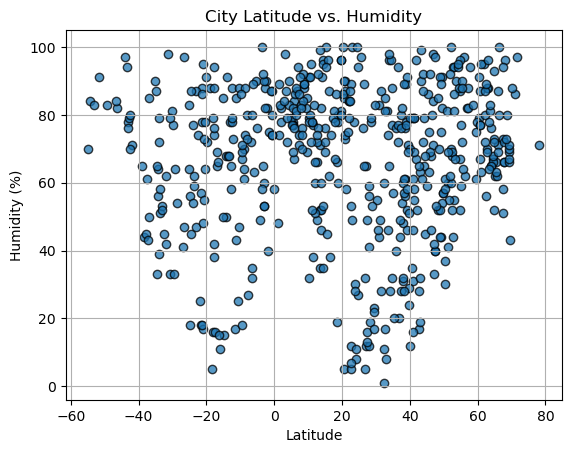

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_weather_data["Lat"], city_weather_data["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

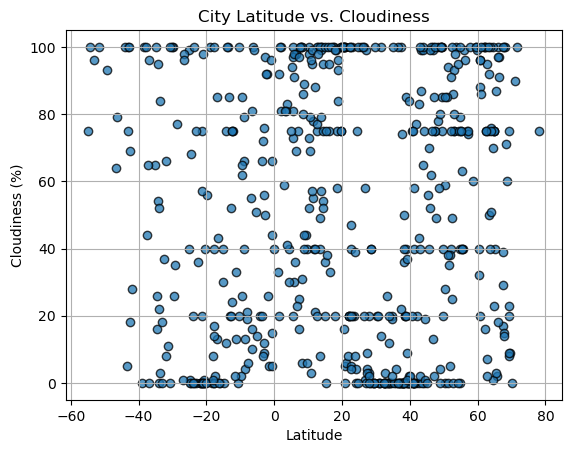

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_weather_data["Lat"], city_weather_data["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

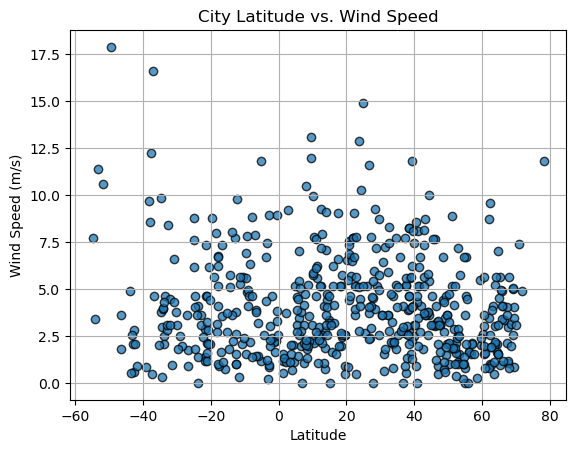

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_weather_data["Lat"], city_weather_data["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,lompoc,34.6391,-120.4579,25.47,77,20,7.72,US,1691084227
3,shimoda,34.6667,138.9500,26.17,88,19,5.23,JP,1691084227
5,vorgashor,67.5833,63.9500,19.55,73,17,2.98,RU,1691084228
6,hoquiam,46.9809,-123.8893,18.31,84,100,0.45,US,1691084228
7,stanley,54.8680,-1.6985,18.21,87,40,0.00,GB,1691084128


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,16.52,64,54,2.99,ZA,1691084226
1,edinburgh of the seven seas,-37.0676,-12.3116,14.51,85,96,16.61,SH,1691084226
4,port-aux-francais,-49.3500,70.2167,2.65,83,93,17.89,TF,1691084227
9,puerto natales,-51.7236,-72.4875,4.31,91,100,10.58,CL,1691084230
13,puerto ayora,-0.7393,-90.3518,29.98,87,44,2.24,EC,1691084053


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.38039635402768174


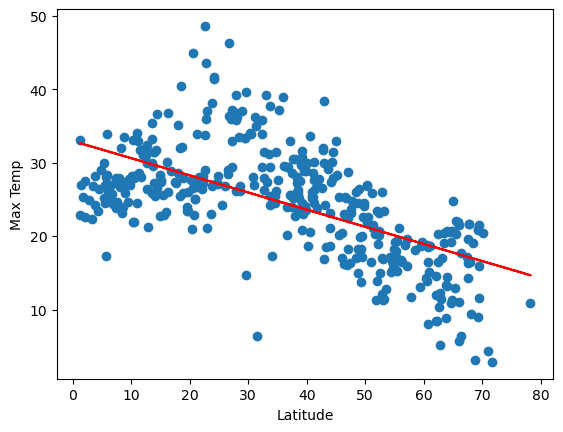

In [41]:
# Linear regression on Northern Hemisphere
north_x = northern_hemi_df['Lat']
north_y = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_val = north_x * slope + intercept
lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(north_x, north_y)
plt.plot(north_x,regress_val,"r-")
plt.annotate(lin_reg_eq,(5,-20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.5710178689987072


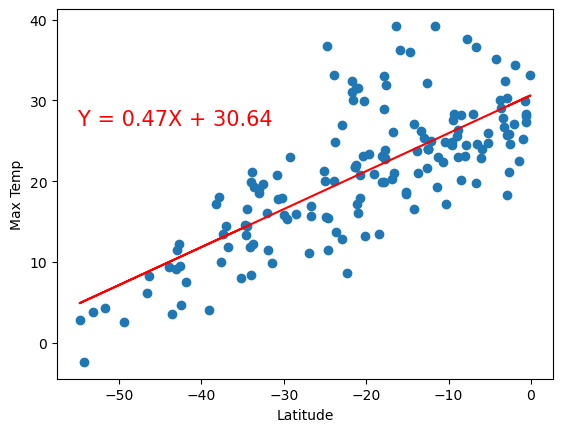

In [42]:
# Linear regression on Southern Hemisphere
south_x = southern_hemi_df['Lat']
south_y = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
s_regress_val = south_x * slope + intercept
s_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(south_x, south_y)
plt.plot(south_x,s_regress_val,"r-")
plt.annotate(s_lin_reg_eq,(-55,27),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')


print(f"The r-value is: {rvalue**2}")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 1.3217512233882132e-09


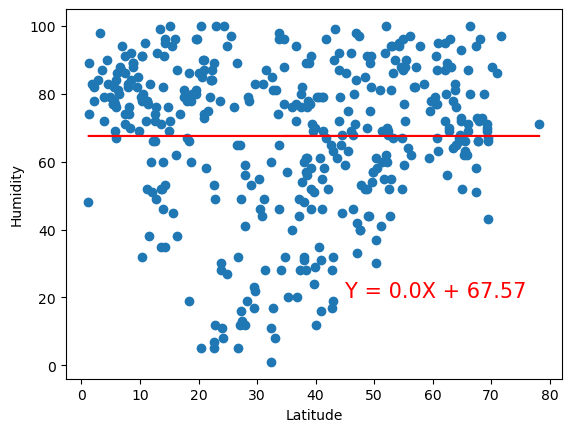

In [43]:
# Northern Hemisphere
h_north_x = northern_hemi_df['Lat']
h_north_y = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(h_north_x, h_north_y)
nh_regress_val = h_north_x * slope + intercept
nh_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(h_north_x, h_north_y)
plt.plot(h_north_x,nh_regress_val,"r-")
plt.annotate(nh_lin_reg_eq,(45,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0011728210319507087


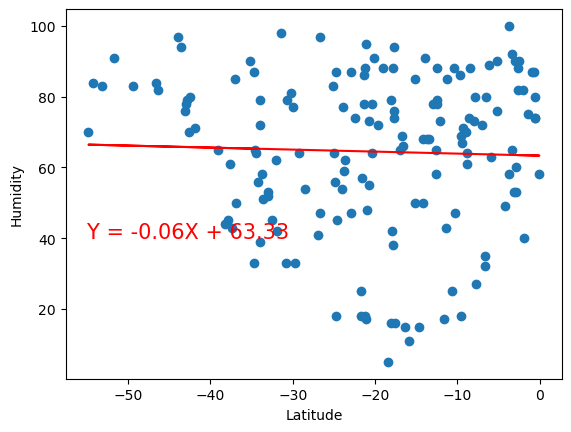

In [44]:
# Southern Hemisphere
h_south_x = southern_hemi_df['Lat']
h_south_y = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(h_south_x, h_south_y)
sh_regress_val = h_south_x * slope + intercept
sh_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(h_south_x, h_south_y)
plt.plot(h_south_x,sh_regress_val,"r-")
plt.annotate(sh_lin_reg_eq,(-55,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')


print(f"The r-value is: {rvalue**2}")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0010956372439621007


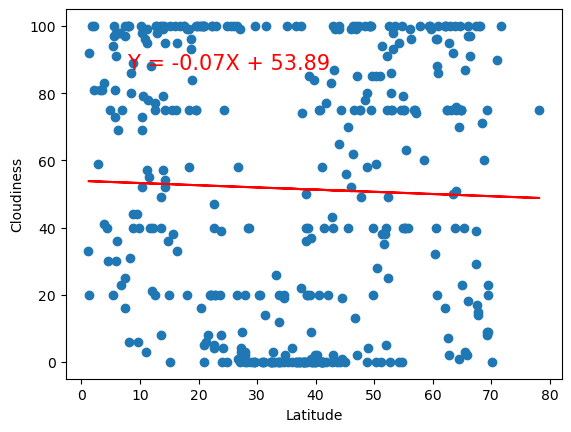

In [45]:
# Northern Hemisphere
c_north_x = northern_hemi_df['Lat']
c_north_y = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(c_north_x, c_north_y)
cn_regress_val = c_north_x * slope + intercept
cn_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(c_north_x, c_north_y)
plt.plot(c_north_x,cn_regress_val,"r-")
plt.annotate(cn_lin_reg_eq,(8,87),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0326642024818439


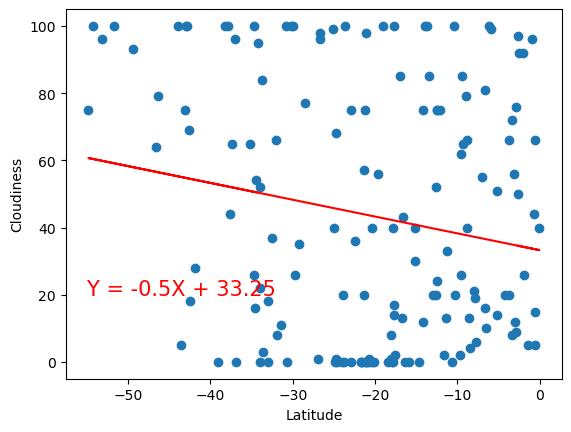

In [46]:
# Southern Hemisphere
c_south_x = southern_hemi_df['Lat']
c_south_y = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(c_south_x, c_south_y)
sc_regress_val = c_south_x * slope + intercept
sc_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(c_south_x, c_south_y)
plt.plot(c_south_x,sc_regress_val,"r-")
plt.annotate(sc_lin_reg_eq,(-55,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


print(f"The r-value is: {rvalue**2}")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.019455733887763754


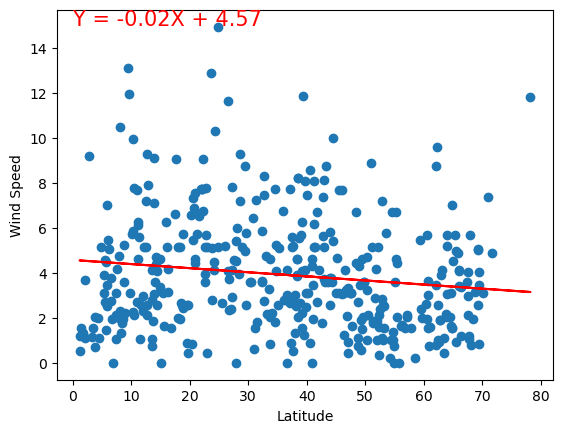

In [47]:
# Northern Hemisphere
w_northern_x = northern_hemi_df['Lat']
w_northern_y = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(w_northern_x, w_northern_y)
nw_regress_val = w_northern_x * slope + intercept
nw_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(w_northern_x, w_northern_y)
plt.plot(w_northern_x,nw_regress_val,"r-")
plt.annotate(nw_lin_reg_eq,(0,15),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.019740706505124137


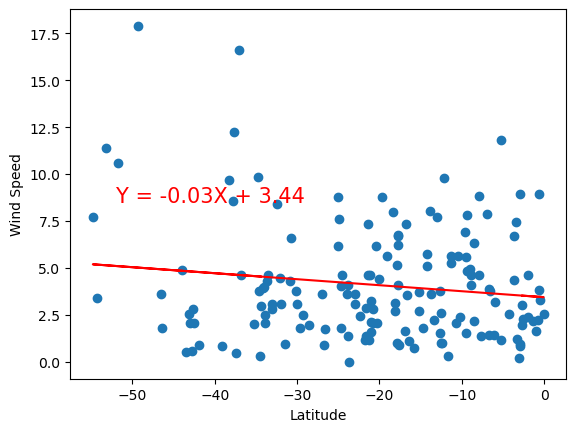

In [49]:
# Southern Hemisphere
w_southern_x = southern_hemi_df['Lat']
w_southern_y = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(w_southern_x, w_southern_y)
sw_regress_val = w_southern_x * slope + intercept
sw_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(w_southern_x, w_southern_y)
plt.plot(w_southern_x,sw_regress_val,"r-")
plt.annotate(sw_lin_reg_eq,(-52,8.5),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue**2}")
plt.show()